In [ ]:
import tensorflow as tf
import numpy as np
import h5py
import matplotlib.pyplot as plt
import math
from scipy.misc import imsave
from datetime import datetime
import alex_net

In [ ]:
def read_hdf5(file_name):
    with h5py.File(file_name, 'r') as f:
        images = np.asarray(f['images4'])
        depths = np.asarray(f['depths'])
    return images, depths

In [ ]:
images, depths = read_hdf5('test_multidim_data.h5')

In [4]:
depths.shape

(1012, 40, 144)

In [14]:
i, j = 222, 226
imagestest  = images[i:j]
depthtest   = depths[i:j]

In [15]:
test_infrared = np.reshape(imagestest, [4, 160, 576, 1])

In [16]:
test_infrared.shape

(4, 160, 576, 1)

In [13]:
#tf.transpose(test_infrared,perm=(1,2,3,0))

<tf.Tensor 'transpose:0' shape=(160, 576, 1, 4) dtype=float32>

In [24]:
test_infrared[1].shape

(160, 576, 1)

In [25]:
a = tf.reshape(test_infrared[1],[1,160,576,1]) 

In [31]:
a.shape

TensorShape([Dimension(1), Dimension(160), Dimension(576), Dimension(1)])

In [32]:
a[0,:,:,:].shape

TensorShape([Dimension(160), Dimension(576), Dimension(1)])

In [33]:
unaries = tf.transpose(a[0,:,:,:],perm=(2,1,0))

In [34]:
unaries

<tf.Tensor 'transpose_3:0' shape=(1, 576, 160) dtype=float32>

In [ ]:
test_infrared[0][0,:,:,:]

In [7]:
type(test_infrared)

numpy.ndarray

In [8]:
logits = alex_net.inference(test_infrared)  #输出之恩个是个tensor 
logits.shape

TensorShape([Dimension(4), Dimension(40), Dimension(144), Dimension(32)])

In [9]:
def test(test_infrared):
    with tf.Graph().as_default():
        images=tf.placeholder(tf.float32,[4,160,576,1])
        logits = alex_net.inference(images)
        saver = tf.train.Saver()
        with tf.Session() as sess:
            saver.restore(sess, 'alex_saver/model.ckpt-80000')
            labels = sess.run([logits],feed_dict={images:test_infrared})
    return labels 

In [10]:
labels = test(test_infrared)

INFO:tensorflow:Restoring parameters from alex_saver/model.ckpt-80000


In [11]:
type(labels)

list

In [12]:
labels = np.array(labels)

In [13]:
labels.shape

(1, 4, 40, 144, 32)

In [15]:
labels = np.reshape(labels,[4,40,144,32])

In [16]:
pred1 = np.argmax(labels, 3)

In [17]:
pred1.shape

(4, 40, 144)

In [18]:
depthtest.shape

(4, 40, 144)

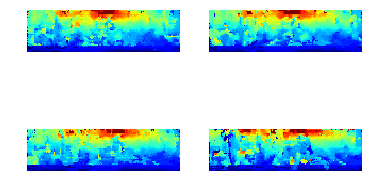

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  app.launch_new_instance()


In [19]:
##输出预测深度
plt.subplot(221)
plt.imshow(pred1[0], cmap = 'jet')
plt.axis('off')
plt.subplot(222)
plt.imshow(pred1[1], cmap = 'jet')
plt.axis('off')
plt.subplot(223)
plt.imshow(pred1[2], cmap = 'jet')
plt.axis('off')
plt.subplot(224)
plt.imshow(pred1[3], cmap = 'jet')
plt.axis('off')
plt.savefig('80000-Alex-222-226.png')
plt.show()
imsave('Alex223.png', pred1[1])

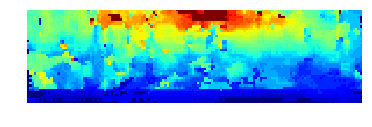

In [22]:
plt.imshow(pred1[1], cmap = 'jet')
plt.axis('off')
plt.savefig('alex_223_savefig.png')
plt.show()

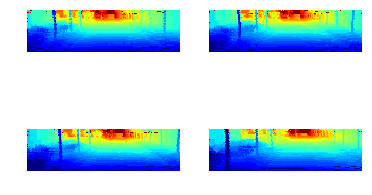

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  app.launch_new_instance()


In [20]:
##输出真实深度
plt.subplot(221)
plt.imshow(depthtest[0], cmap = 'jet')
plt.axis('off')
plt.subplot(222)
plt.imshow(depthtest[1], cmap = 'jet')
plt.axis('off')
plt.subplot(223)
plt.imshow(depthtest[2], cmap = 'jet')
plt.axis('off')
plt.subplot(224)
plt.imshow(depthtest[3], cmap = 'jet')
plt.axis('off')
plt.savefig('alex_groundtruth222-226.png')
plt.show()
imsave('alex223-groundtruth.png', depthtest[1])

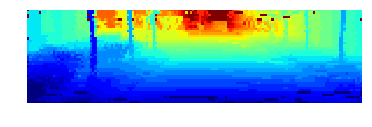

In [23]:
plt.imshow(depthtest[1], cmap = 'jet')
plt.axis('off')
plt.savefig('alex_groundtruth223_savefig.png')
plt.show()

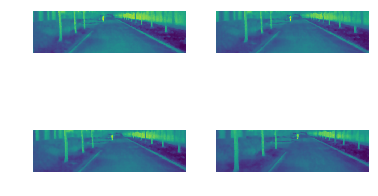

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  app.launch_new_instance()


In [21]:
##输出红外图像
plt.subplot(221)
plt.imshow(imagestest[0])
plt.axis('off')
plt.subplot(222)
plt.imshow(imagestest[1])
plt.axis('off')
plt.subplot(223)
plt.imshow(imagestest[2])
plt.axis('off')
plt.subplot(224)
plt.imshow(imagestest[3])
plt.axis('off')
plt.savefig('alex_infrareds222-226.png')
plt.show()
imsave('alex223-infrareds.png', imagestest[1])

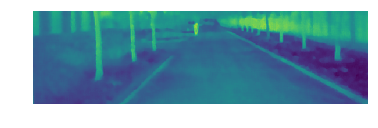

In [24]:
plt.imshow(imagestest[1])
plt.axis('off')
plt.savefig('alex_infrareds223_savefig.png')
plt.show()